# Summary

    - This notebook is intended to understand the concept of ROC, AUC, Precision Vs Recall and Thresholds
    - These metrics are useful for evaluating and comparing classification models
    - While these Precision, Recall, F1-Score, Confusion metrics are used commonly, this notebook focusses some aspects of these metrics which I had previously not explored.
    
### Approach
    - We will build a simple classification model and purposefully configure it to give a low accuracy
    - We will then evaluate the RUC curve, RUC-AUC score
    - We will then evaluate at which threshold does the model has better Precision & Recall score

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

data = load_breast_cancer()
X = data.data
y = data.target

trainX, testX, trainY, testY = train_test_split(X,y)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# purposefully put estimators as 1 to get a bad accuracy
clf = RandomForestClassifier(n_estimators=1)
rfc = clf.fit(trainX, trainY)
yTestHat = rfc.predict(testX)

#### Plot ROC (= FPR vs TPR) Graph

    - ROC graph is a plot of different values of FPR & TPR for different values of Threshold on which model is evaluated
    - For e.g. if Threshold is set to .5 for classification we would get one set of values for FPR and TPR
    - if Threshold is set to 0.6 we would get another set of values for FPR and TPR
    - So, all of these values of FPR and TPR when plotted give an ROC curve
    - What we are looking for are those values of FPR & TPR which are as close to the top left corner of the graph - Why ? Because at top left corner our TPR would be maximum and FPR would be minimum. Which means that the model is giving least False Positives and maximum number of True Postives

In [21]:
def show_roc_curve(falsePositiveRate, truePositiveRate):
    plt.plot(falsePositiveRate, truePositiveRate)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001,1])
    plt.ylim([0,1.001])
    plt.show()

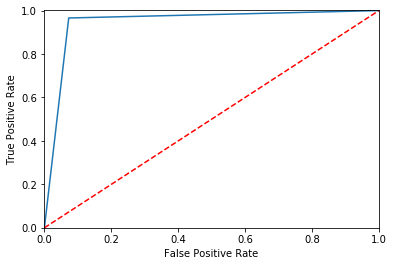

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(testY, yTestHat)
show_roc_curve(fpr, tpr)

# Red line in the resultant graph represents those data points where the FPR & TPR is same.

#### Plot Recall vs Precision Graph

    - Precision & Recall are two competing forces to evaluate a model. 
    - Precision would be maximum when the number of False Positives would be least
    - Recall would be maximum when the number of False Negatives would be least.
    
    To understand better, say we are trying to predict Fraud Transactions and we build a classifier for that.
    --TODO UPDATE THIS

In [43]:
def show_precision_recall_curve(precision, recall):
    plt.plot(recall, precision)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.show()

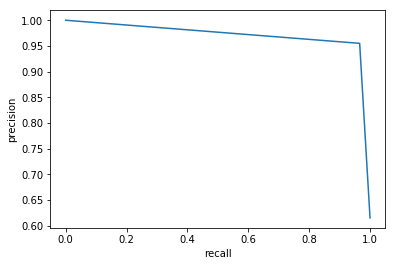

In [44]:
from sklearn.metrics import precision_recall_curve

p, r, th = precision_recall_curve(testY, yTestHat)
show_precision_recall_curve(p,r)

#### Plot Precision vs Threshold Graph
    
    - This is an interesting graph to consider.
    - Here we are check how precision varies as threshold changes
    - What we will find is that as the threshold increases the Precision value increases. 
        - Which means that model increasingly starts classifying thiings as Positive. This is obviously not good because by doing so the False Negatives would start increasing.
    

#### Plot Recall vs Threshold Graph
    
    - This is an interesting graph to consider.
    - Here we are check how precision varies as threshold changes
    - What we will find is that as the threshhold keeps increasing the Recall value keeps decreasing.
        - Which means that model is increasingly classifying as Negatives and hence False Negatives are increasing    

## Conclusion - Precision, Recall, Threshold Graphs

    - So, we need to find that value of Threshold at which both Precision and Recall are balanced.
    - OR, for certain type of problems we may keep Threshold low which would give us zero False Negatives although this would come at the cost model predicting False Positives.

In [45]:
def show_precision_recall_threshold_curve(precision, recall, threshold):
    
    figure = plt.figure()
    
    ax1 = figure.add_subplot(211)
    plt.plot(threshold, precision[1:])
    plt.xlabel('threshold')
    plt.ylabel('precision')
    
    ax1 = figure.add_subplot(212)
    plt.plot(threshold, recall[1:])
    plt.xlabel('threshold')
    plt.ylabel('recall')
    
    plt.show()

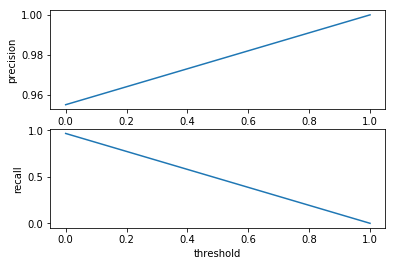

In [46]:
show_precision_recall_threshold_curve(p,r,th)